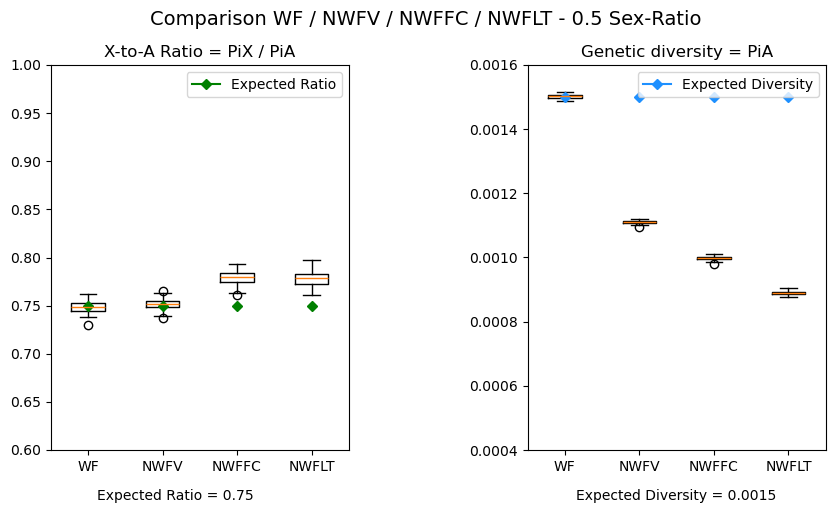

In [1]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER_WF = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Pi_WF_NWFVan/"
FOLDER_V = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Pi_WF_NWFVan/"
FOLDER_FC = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_FemaleChoice/Pi_WF_NWFFC/"
FOLDER_LT = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Hybridization/1SLiM_File/"

FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Pi_WF_NWFLT/"

LSexRatio = [0.25,0.3,0.4,0.5,0.6,0.7,0.75]
SR = 0.5
WF_Pi_ratio = []
NWFV_Pi_ratio = []
NWFFC_Pi_ratio = []
NWFLT_Pi_ratio = []
    
WF_PiA = []
NWFV_PiA = []
NWFFC_PiA = []
NWFLT_PiA = []

for NUM in range(1,501):
        
    File = FOLDER_WF+"WF_SexRatio"+str(SR)+","+str(NUM)+".txt"
    if os.path.isfile(File):
        Text = open(File, 'r')
        Values = Text.read().split()
        if len(Values) > 0:
            WF_Pi_ratio.append(float(Values[1])/float(Values[0]))
            WF_PiA.append(float(Values[0]))
            Text.close()
            
    File = FOLDER_V+"NWF_Van_SexRatio"+str(SR)+","+str(NUM)+".txt"
    if os.path.isfile(File):
        Text = open(File, 'r')
        Values = Text.read().split()
        if len(Values) > 0:
            NWFV_PiA.append(float(Values[0]))
            NWFV_Pi_ratio.append(float(Values[1])/float(Values[0]))
            Text.close()

    File = FOLDER_FC+"NWF_FC_SexRatio"+str(SR)+","+str(NUM)+".txt"
    if os.path.isfile(File):
        Text = open(File, 'r')
        Values = Text.read().split()
        if len(Values) > 0:
            NWFFC_PiA.append(float(Values[0]))
            NWFFC_Pi_ratio.append(float(Values[1])/float(Values[0]))
            Text.close()

TSEP = [0,5000,10000,15000,20000,25000,30000]
nmig = 100
counter = 0
L_XtoA = []
L_A = []
for tsep in TSEP:
    for NUM in range(1,21):
        XtoA = []
        A = []
        File = FOLDER_LT + f"NWFLT_Hyb_Pi_OM{tsep},{nmig},{NUM}.txt"
        if os.path.isfile(File):
            with open(File, 'r', encoding='utf-8') as Text:
                for ligne in Text:
                    Values = ligne.strip().split()
                    if len(Values) > 1:
                        try:
                            XtoA.append(float(Values[1]) / float(Values[0]))
                            A.append(float(Values[0]))
                        except (ValueError, ZeroDivisionError):
                            pass  # ou afficher un message d'erreur si tu veux
        L_XtoA .append(XtoA)
        L_A.append(A)

BP = int(60000/500-1)
for el in L_XtoA:
    if len(el) > BP:
        NWFLT_Pi_ratio.append(el[BP])    
for el in L_A:
    if len(el) > BP:
        NWFLT_PiA.append(el[BP]) 


    
expected_ratio = 1-SR*0.5
Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
expected_teta = round (4*Ne*40*1.25e-8,10)
    
WF_median = np.median(WF_Pi_ratio)
NWFV_median = np.median(NWFV_Pi_ratio)
NWFFC_median = np.median(NWFFC_Pi_ratio)
NWFLT_median = np.median(NWFLT_Pi_ratio)
    
WF_PiA_median = np.median(WF_PiA)
NWFV_PiA_median = np.median(NWFV_PiA)
NWFFC_PiA_median = np.median(NWFFC_PiA)
    
NWFLT_PiA_median = np.median(NWFLT_PiA)

    
fig, ax = mp.subplots(1,2,figsize=(10, 5))
fig.subplots_adjust(wspace=0.6)
fig.suptitle(f"Comparison WF / NWFV / NWFFC / NWFLT - {SR} Sex-Ratio", fontsize=14, y=0.99)

ax[0].boxplot([WF_Pi_ratio,NWFV_Pi_ratio,NWFFC_Pi_ratio,NWFLT_Pi_ratio],tick_labels=["WF","NWFV","NWFFC","NWFLT"])
ax[0].set_title("X-to-A Ratio = PiX / PiA")
ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
ax[0].plot(2, expected_ratio, marker='D', color='green', markersize=5)
ax[0].plot(3, expected_ratio, marker='D', color='green', markersize=5)
ax[0].plot(4, expected_ratio, marker='D', color='green', markersize=5)
ax[0].set_ylim([0.6, 1])
ax[0].legend()

ax[1].boxplot([WF_PiA,NWFV_PiA,NWFFC_PiA,NWFLT_PiA],tick_labels=["WF","NWFV","NWFFC","NWFLT"])
ax[1].set_title("Genetic diversity = PiA")
ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
ax[1].plot(2, expected_teta, marker='D', color='dodgerblue', markersize=5)
ax[1].plot(3, expected_teta, marker='D', color='dodgerblue', markersize=5)
ax[1].plot(4, expected_teta, marker='D', color='dodgerblue', markersize=5)
ax[1].set_ylim([0.0004, 0.0016])
ax[1].legend()

fig.text(0.25, 0.01, 'Expected Ratio = '+str(expected_ratio), 
         ha='center', fontsize=10)

fig.text(0.75, 0.01, 'Expected Diversity = '+str(expected_teta), 
         ha='center', fontsize=10)
    
#fig.savefig(FOLDER_output+'WF_All_NWF_SexRatio'+str(SR)+'.png') 

mp.show()